In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import time
import sklearn
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.0
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)


In [7]:
# 卷积
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='selu',input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='selu')) # keras.layers.Conv2D
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='selu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=["accuracy"])


In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)        

In [13]:
logdir = 'cnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model_h5")


callbacks = [keras.callbacks.TensorBoard(logdir),
             keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
             keras.callbacks.EarlyStopping(min_delta=1e-8,patience=5)]

history = model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid),callbacks= callbacks)



Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.8428 ETA: 2s - losWARNING:tensorflow:From D:\Users\Administrator\Anaconda3\envs\tensorflow2.0\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cnn-selu-callbacks\fashion_mnist_model_h5\assets
55000/55000 [==============================] - 307s 6ms/sample - loss: 0.4351 - accuracy: 0.8428 - val_loss: 0.3128 - val_accuracy: 0.8896
Epoch 2/10
55000/55000 [==============================] - 313s 6ms/sample - loss: 0.2872 - accuracy: 0.8961 - val_loss: 0.2752 - val_accuracy: 0.8980
Epoch 3/10
55000/55000 [==============================] - 321s 6ms/sampl

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

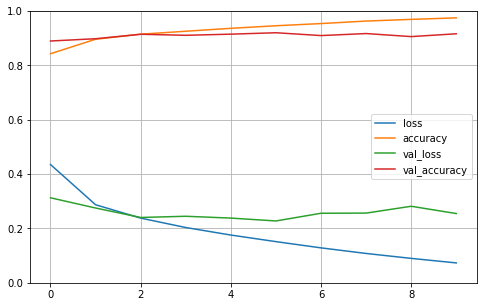

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [17]:
model.evaluate(x_test_scaled,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.29459049433469775, 0.9115]

In [ ]:
# tensorboard 展示，命令行下执行，注意：文件目录
# tensorboard --logdir=callbacks